# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [1]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Estimation of mean

* Load data
* Make assumptions
* Estimate mean
* Write down confidence interval

In [2]:
!head -n 3 data/NYPowerBall.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import csv
data = []

with open('data/NYPowerBall.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [4]:
[1,2]+[2,3]

[1, 2, 2, 3]

In [6]:
list_of_lists = [[int(str_number) for str_number in d[1].split(' ')] for d in data]
numbers = sum(list_of_lists,start=[])
print(numbers)

[1, 2, 3, 7, 39, 25, 5, 13, 28, 38, 63, 21, 10, 17, 18, 43, 65, 13, 2, 12, 16, 29, 54, 6, 8, 12, 20, 21, 32, 10, 23, 25, 47, 48, 50, 24, 5, 8, 41, 65, 66, 20, 14, 29, 31, 56, 61, 1, 7, 36, 48, 57, 58, 24, 6, 19, 37, 49, 59, 22, 3, 7, 15, 27, 69, 19, 8, 12, 42, 46, 56, 12, 12, 42, 51, 53, 62, 25, 5, 25, 38, 52, 67, 24, 21, 28, 30, 40, 59, 26, 15, 29, 31, 37, 43, 16, 8, 38, 43, 52, 55, 17, 4, 9, 21, 29, 64, 26, 14, 32, 34, 46, 61, 10, 9, 11, 36, 37, 38, 11, 10, 11, 47, 55, 58, 26, 4, 19, 59, 68, 69, 21, 11, 33, 51, 56, 58, 18, 7, 14, 23, 38, 55, 18, 6, 8, 20, 52, 68, 5, 7, 42, 49, 62, 69, 23, 5, 29, 34, 53, 57, 24, 26, 28, 34, 42, 50, 25, 15, 21, 24, 32, 65, 11, 7, 25, 39, 40, 47, 20, 8, 12, 13, 19, 27, 4, 3, 21, 45, 53, 56, 22, 16, 54, 57, 62, 69, 23, 3, 57, 64, 68, 69, 15, 11, 14, 32, 43, 65, 15, 8, 23, 27, 42, 60, 7, 1, 22, 27, 53, 67, 15, 41, 53, 59, 63, 66, 3, 9, 17, 34, 59, 64, 22, 1, 2, 7, 30, 50, 8, 24, 61, 63, 64, 69, 18, 4, 39, 48, 50, 51, 11, 2, 18, 19, 24, 34, 3, 6, 28, 48, 6

In [11]:
len(numbers)

5646

In [12]:
import numpy as np
arr = np.array(list_of_lists)
numbers_arr = arr.flatten()
print(numbers_arr)

[ 1  2  3 ... 37 52 24]


In [14]:
np.unique(numbers_arr)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])

In [15]:
np.max(numbers_arr)

69

In [16]:
np.min(numbers_arr)

1

### Assumption about data

* Integers between 1 and 69
* We assume that the lotto draws are independent and identically distributed

### What to do

Compute confidence interval using Hoeffdings inequality using the bounds above

Lets say we fix a level $\alpha \in (0,1)$, and solve the equation
$$
    \alpha = 2 e^{-\frac{2n\epsilon^2}{(b-a)^2}}
$$

$$
    \ln(\alpha/2) = -\frac{2n\epsilon^2}{(b-a)^2}
$$

$$
    -(b-a)^2\ln(\alpha/2)/(2n) =\epsilon^2
$$

$$
\sqrt{(b-a)^2\ln(2/\alpha)/(2n)} = \epsilon
$$

In [17]:
def compute_epsilon(alpha,n,a,b):
    return np.sqrt((b-a)**2*np.log(2/alpha)/(2*n))

In [18]:
alpha = 0.05
n = numbers_arr.shape[0]
a = 1
b = 69
delta = compute_epsilon(alpha,n,a,b)
delta

1.2290532787806112

In [19]:
conf_interval = (np.mean(numbers_arr)-delta,np.mean(numbers_arr)+delta)
print("Confidencen interval for the mean is: ",conf_interval)

Confidencen interval for the mean is:  (28.29361763868308, 30.751724196244304)


In [20]:
import Utils

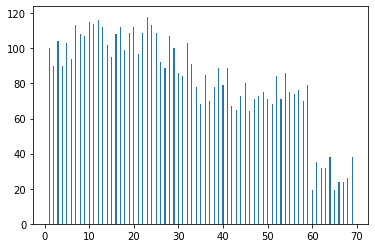

In [21]:
import matplotlib.pyplot as plt
#_=plt.hist(numbers_arr,bins=)
Utils.discrete_histogram(numbers_arr)

# Likelihood of parameter

* Load data
* Work with dates
* Make assumptions
* Write down the Risk
* Split into two parts
* Minimize the risk numerically on train
* Test the risk on test
* Make confidence intervals

In [22]:
!head -n 10 data/earthquakes.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
import csv
data = []

with open('data/earthquakes.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [24]:
header[2]

'origintime'

In [25]:
data[0][2]

'2018-05-17T12:19:35.516Z'

In [26]:
import datetime
#-05-17T12:19:35.516Z
datetime.datetime.strptime(data[0][2],"%Y-%m-%dT%H:%M:%S.%fZ")

datetime.datetime(2018, 5, 17, 12, 19, 35, 516000)

In [28]:
origin_time = [datetime.datetime.strptime(d[2],"%Y-%m-%dT%H:%M:%S.%fZ") for d in data]
origin_time

[datetime.datetime(2018, 5, 17, 12, 19, 35, 516000),
 datetime.datetime(2018, 5, 17, 11, 38, 24, 646000),
 datetime.datetime(2018, 5, 17, 10, 46, 46, 526000),
 datetime.datetime(2018, 5, 17, 10, 1, 46, 378000),
 datetime.datetime(2018, 5, 17, 9, 40, 4, 992000),
 datetime.datetime(2018, 5, 17, 9, 10, 38, 932000),
 datetime.datetime(2018, 5, 17, 8, 59, 42, 531000),
 datetime.datetime(2018, 5, 17, 8, 32, 19, 667000),
 datetime.datetime(2018, 5, 17, 8, 0, 24, 390000),
 datetime.datetime(2018, 5, 17, 7, 37, 16, 451000),
 datetime.datetime(2018, 5, 17, 7, 23, 43, 991000),
 datetime.datetime(2018, 5, 17, 6, 47, 55, 131000),
 datetime.datetime(2018, 5, 17, 6, 34, 28, 900000),
 datetime.datetime(2018, 5, 17, 6, 29, 34, 123000),
 datetime.datetime(2018, 5, 17, 6, 21, 47, 580000),
 datetime.datetime(2018, 5, 17, 6, 11, 46, 36000),
 datetime.datetime(2018, 5, 17, 5, 59, 22, 258000),
 datetime.datetime(2018, 5, 17, 5, 26, 21, 628000),
 datetime.datetime(2018, 5, 17, 5, 0, 45, 993000),
 datetime.dat

In [30]:
or_time_arr = np.array(origin_time)
sort_time_arr = np.sort(or_time_arr)
time_between_eq=np.diff(sort_time_arr)
print(sort_time_arr)
print(time_between_eq)

[datetime.datetime(2017, 6, 1, 0, 7, 4, 890000)
 datetime.datetime(2017, 6, 1, 0, 15, 55, 74000)
 datetime.datetime(2017, 6, 1, 0, 25, 6, 491000) ...
 datetime.datetime(2018, 5, 17, 10, 46, 46, 526000)
 datetime.datetime(2018, 5, 17, 11, 38, 24, 646000)
 datetime.datetime(2018, 5, 17, 12, 19, 35, 516000)]
[datetime.timedelta(seconds=530, microseconds=184000)
 datetime.timedelta(seconds=551, microseconds=417000)
 datetime.timedelta(seconds=764, microseconds=156000) ...
 datetime.timedelta(seconds=2700, microseconds=148000)
 datetime.timedelta(seconds=3098, microseconds=120000)
 datetime.timedelta(seconds=2470, microseconds=870000)]


In [31]:
time_between_eq_arr = np.array([d.total_seconds() for d in time_between_eq])

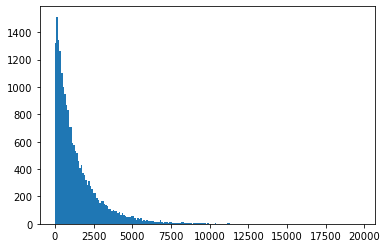

In [32]:
_=plt.hist(time_between_eq_arr,bins=200)

### Assumptions on data

* Exponentially distributed
* Lets also assume that they are IID

The density is given by?
$$
    f(x) = \lambda^\ast e^{-\lambda^\ast x}
$$

$$
    L(f_\lambda,x) = -\ln(f_\lambda(x))
$$

$$
    E[L(f_\lambda,x)] = E[-\ln(f_\lambda(x))]
$$

$$
    \hat R(\lambda) = \frac{1}{n} \sum_{i=1}^n (- \ln(f_\lambda(X_i))
$$

$$
    -\ln(f_\lambda(x)) = -\ln(\lambda) + \lambda x
$$

In [33]:
np.random.shuffle(time_between_eq_arr)
total_n = len(time_between_eq_arr)
train_n = int(total_n*0.5)
test_n = total_n-train_n

train_data, test_data = (time_between_eq_arr[:train_n],time_between_eq_arr[train_n:])

In [34]:
train_data

array([ 2930.726,  1733.625,  2921.137, ..., 10753.058,  2013.019,
         571.026])

In [35]:
test_data

array([1173.273, 2234.259,  617.137, ..., 1305.583,  455.145, 3602.589])

In [36]:
# define the objective/cost/loss function we want to minimise
def empirical_risk_train(l):
    return np.mean(-np.log(l)+l*train_data)

In [37]:
empirical_risk_train(0.001)

8.349629371396718

In [39]:
from scipy import optimize
result = optimize.minimize(empirical_risk_train,0.0001,method='Nelder-Mead')
l_hat = result['x'][0]
l_hat

0.0006950000000000012

In [40]:
1/l_hat

1438.8489208633068

Lets consider the loss
$$
    L(c,x) = |c-x|
$$
The risk then becomes
$$
    R(c) = E[L(c,x)] = E[|c-x|]
$$

So, for our problem, since we have estimated $\hat \lambda$ we can test it as a method of prediction by estimating the following quantity
$$
    E[|1/\hat \lambda - X| \mid \hat \lambda]
$$

We could use our testing data to estimate the above, i.e.
$$
    \frac{1}{n_{test}} \sum_{X_i \in \text{ testing data}} |1/\hat \lambda - X_i|
$$

In [41]:
np.mean(np.abs(1/l_hat - test_data))

1113.2668024711552

In [42]:
np.mean(np.abs(test_data-np.mean(test_data)))

1113.676851479066

# Logistic Regression

* Load the data
* Separate the data into two parts
* Scale the training data (standard scaling)
* Convert labels to -1 1 for better numerics
* Solve the minimal risk problem
* Tranform the test data with the scaling of the train data
* Test the model
* Confidence interval around prediction

In [43]:
!head -n 10 data/CORIS.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
# Load data
# Standard scale
# Convert labels to -1,1
# Solve the likelihood problem

In [45]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sum(np.log(1+np.exp(-Y1*(x[0] + x[1]*X_sc[:,9]))))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-10, 2), (-10, 2)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
result = optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box,) # just call the minimize method!
result

NameError: name 'Y1' is not defined